<a href="https://colab.research.google.com/github/Thavatharani06/231801180_PODS/blob/main/Ex1_Data_Preprocessing_and_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   

/tmp/ipython-input-4-3409250977.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex_encoded'] = le.fit_transform(df['sex'])
/tmp/ipython-input-4-3409250977.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fare_scaled'] = scaler.fit_transform(df[['fare']])


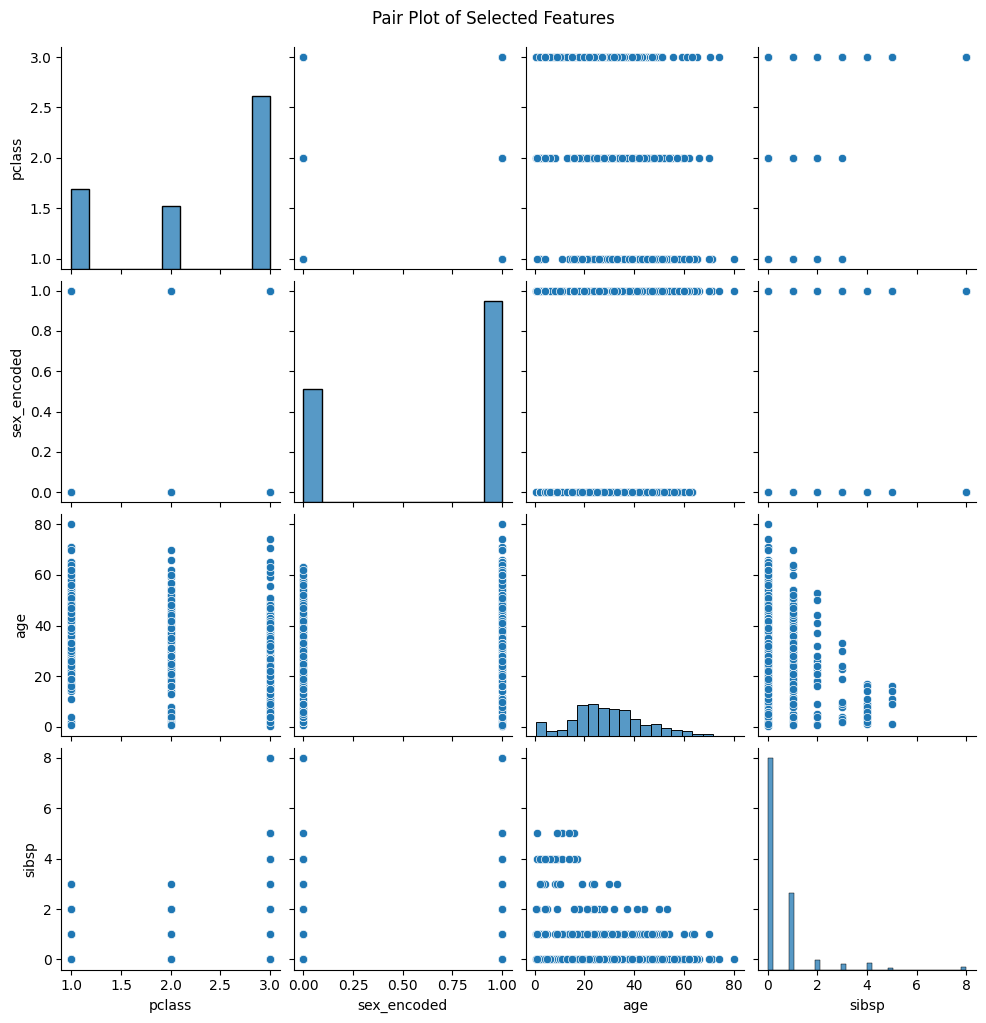

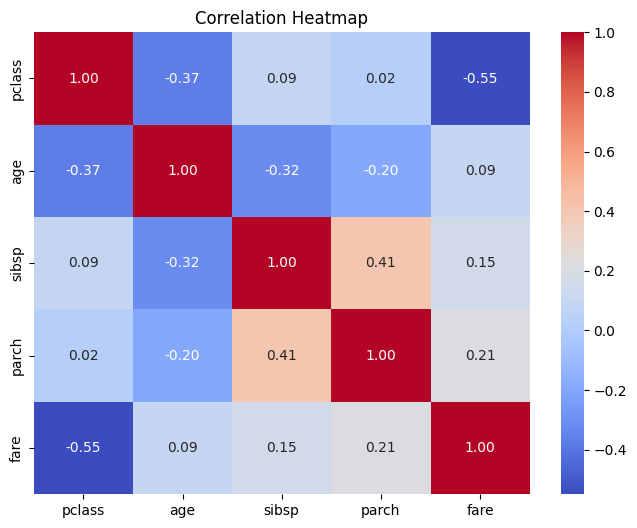

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = sns.load_dataset('titanic')

print("First 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing values in each column:")
print(df.isnull().sum())

df['age_ffill'] = df['age'].ffill()
df['age_bfill'] = df['age'].bfill()

df['deck'] = df['deck'].cat.add_categories('unknown')
df['deck'] = df['deck'].fillna('unknown')
print("\nFirst 5 'deck' values after fillna:")
print(df['deck'].head(5))

df = df.drop_duplicates()

le = LabelEncoder()
df['sex_encoded'] = le.fit_transform(df['sex'])

scaler = StandardScaler()
df['fare_scaled'] = scaler.fit_transform(df[['fare']])

sns.pairplot(df[['pclass', 'sex_encoded', 'age', 'sibsp']])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

features = ['pclass', 'age', 'sibsp', 'parch', 'fare']
corr = df[features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

